## 🖼️ Colorizing Black & White Images with CNN

---

### 1️⃣ Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.datasets import cifar10
import cv2

### 2️⃣ Dataset Overview
We use **CIFAR-10**, a dataset of 60,000 color images (32x32 pixels) across 10 classes. We are not classifying but using the images to train our model to predict colors.

### 🔹 Load and Normalize Dataset

In [3]:
(X_train, _), (X_test, _) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 397s 2us/step


### 3️⃣ Preprocessing
We convert images from **RGB** to **Lab color space**:
- **L channel**: Lightness (grayscale)
- **a/b channels**: Color information

In [4]:
X_train_lab = [cv2.cvtColor(img, cv2.COLOR_RGB2LAB) for img in X_train]
X_test_lab = [cv2.cvtColor(img, cv2.COLOR_RGB2LAB) for img in X_test]

X_train_lab = np.array(X_train_lab)
X_test_lab = np.array(X_test_lab)

X_train_L = X_train_lab[:,:,:,0]
X_train_ab = X_train_lab[:,:,:,1:] / 128
X_test_L = X_test_lab[:,:,:,0]
X_test_ab = X_test_lab[:,:,:,1:] / 128

X_train_L = X_train_L.reshape(X_train_L.shape + (1,))
X_test_L = X_test_L.reshape(X_test_L.shape + (1,))

### 4️⃣ Model Architecture
We build a **CNN** that:
- Takes the L (grayscale) channel as input
- Predicts the a/b (color) channels

In [12]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
#model.add(UpSampling2D((2, 2)))

### 5️⃣ Compile and Train
We use **Mean Squared Error (MSE)** loss and the Adam optimizer.

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_L, X_train_ab, validation_data=(X_test_L, X_test_ab), epochs=32, batch_size=128)

Epoch 1/32
391/391 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - loss: 0.0471 - val_loss: 0.0110
Epoch 2/32
391/391 ━━━━━━━━━━━━━━━━━━━━ 514s 1s/step - loss: 0.0108 - val_loss: 0.0109
Epoch 3/32
291/391 ━━━━━━━━━━━━━━━━━━━━ 2:05 1s/step - loss: 0.0109

### 6️⃣ Predict & Visualize Results
We predict the a/b channels and merge them with the original L channel to create the colorized images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


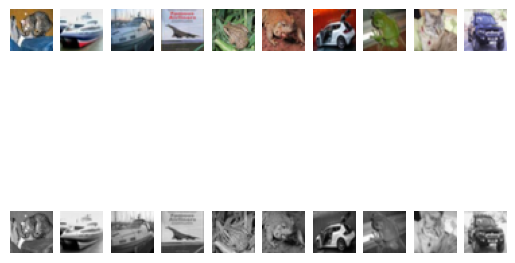

In [10]:
output_ab = model.predict(X_test_L[:10])
output_ab = output_ab * 128

for i in range(10):
    cur_L = X_test_L[i][:,:,0]
    cur_lab = np.zeros((32, 32, 3))
    cur_lab[:,:,0] = cur_L
    #cur_lab[:,:,1:] = output_ab[i]
    rgb = cv2.cvtColor(cur_lab.astype('float32'), cv2.COLOR_LAB2RGB)
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.subplot(2,10,i+11)
    plt.imshow(rgb)
    plt.axis('off')
plt.show()

## ✅ Conclusion
This notebook shows how a simple CNN can learn to colorize grayscale images. While basic, it forms the foundation for more advanced models that achieve stunning results on high-resolution images.